In [5]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot
import corner.corner
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
#import SciencePlots 
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

In [2]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms  
                   
j=0
one_data_difmodel_maxl=list()
data_sets={}

for i in range(len(sub_model_name_list)):
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    pos=bilby.result.read_in_result( fname )
    poss=np.array(pos.posterior.iloc[-1,:-2])
    one_data_difmodel_maxl.append(poss)
    
os.path.exists(main_direct + '{}.txt'.format(mrms_data_label[j]) )
data_names=glob.glob(main_direct + '{}.txt'.format(mrms_data_label[j]) )
datname=data_names[0]
data_sets['data_'+str(mrms_data_label[j])]=np.loadtxt(main_direct + '{}.txt'.format(mrms_data_label[j]) )    

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


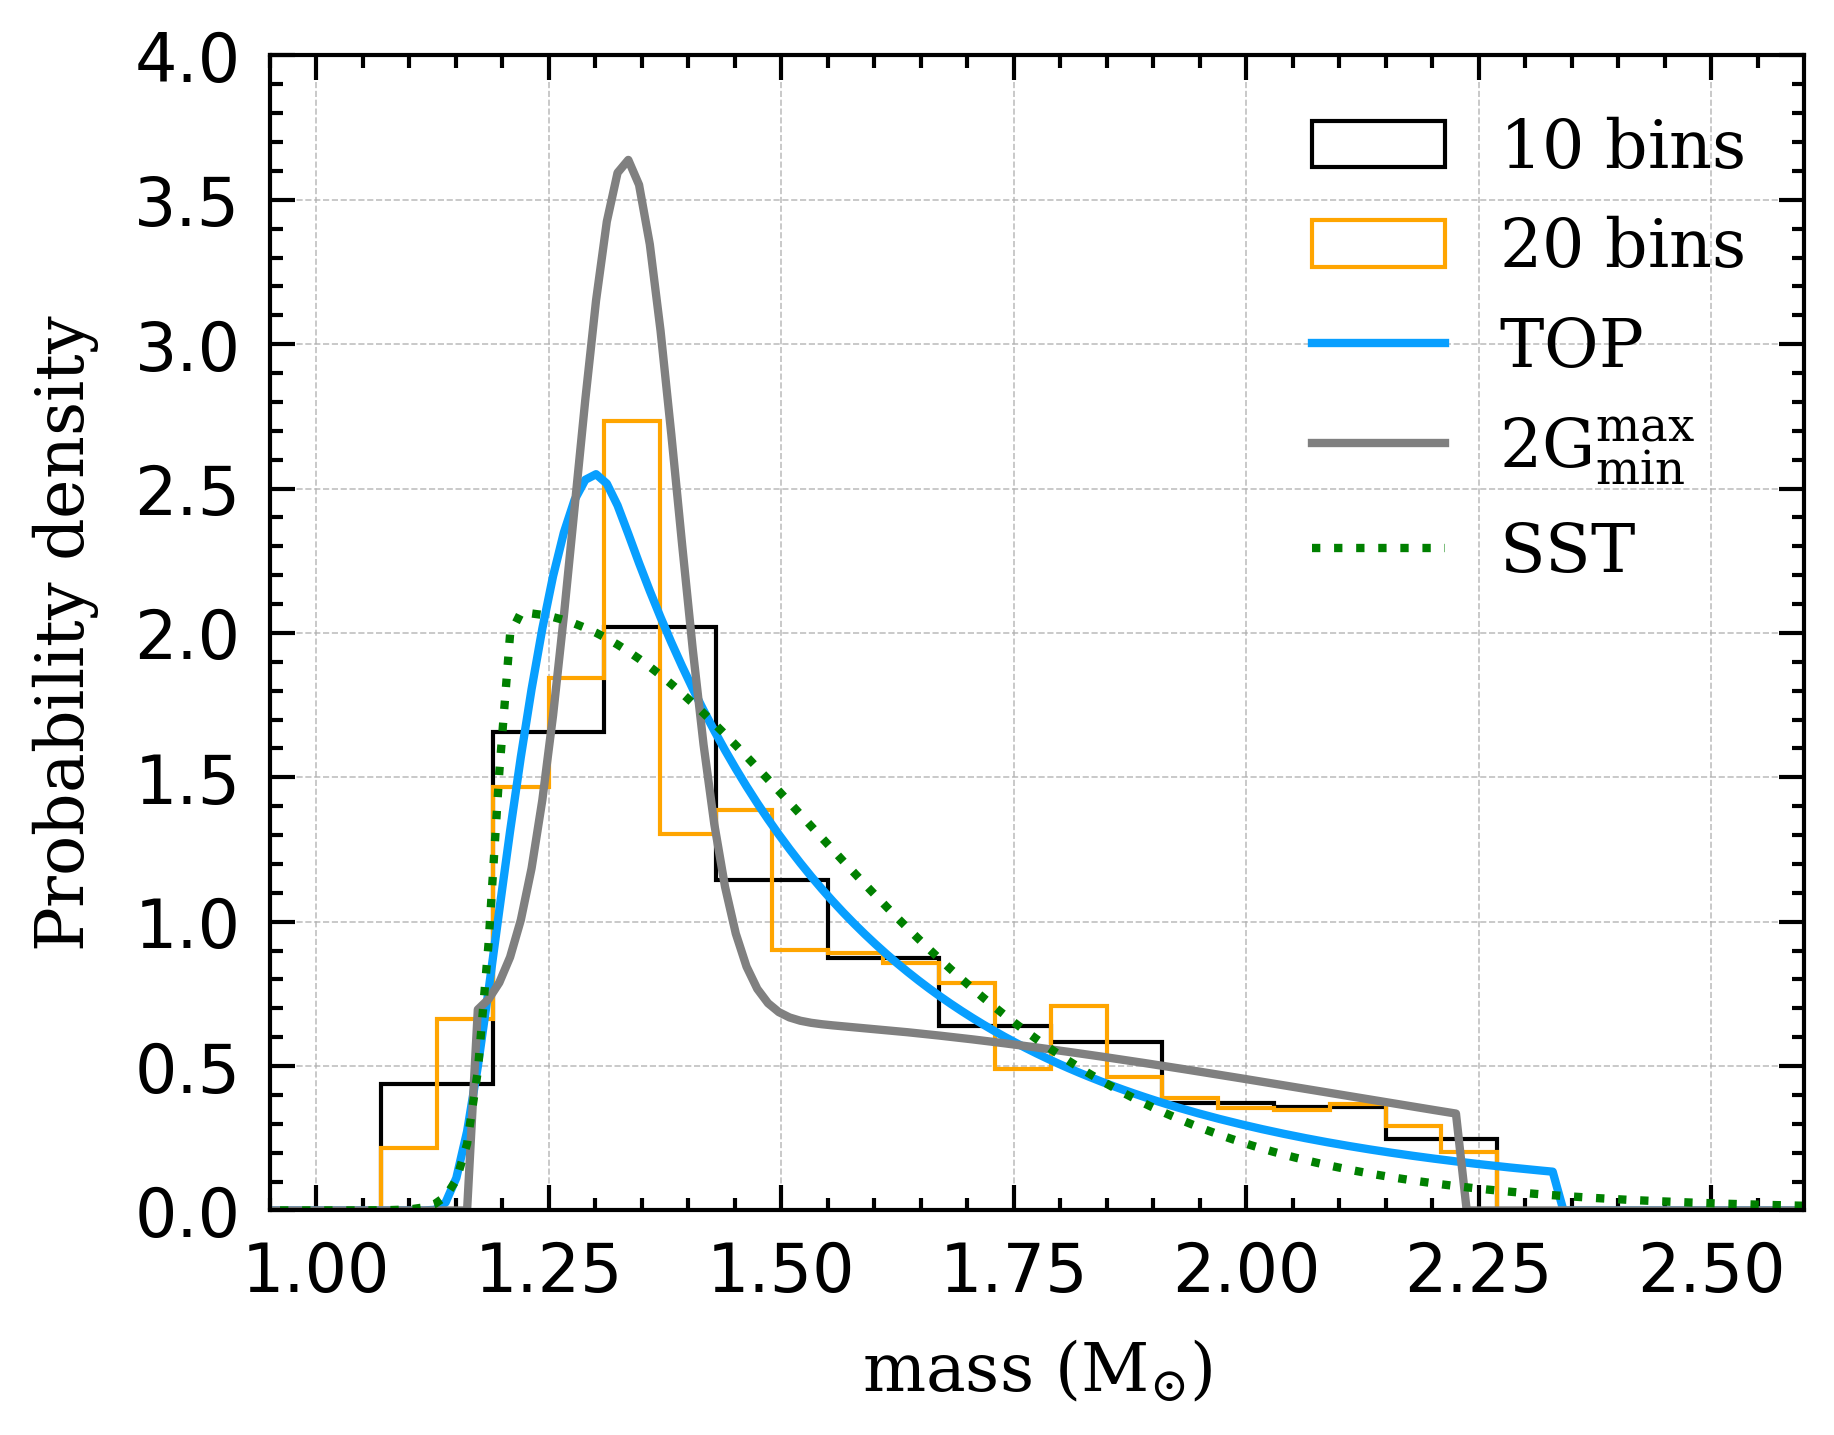

In [18]:
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

j=0
data_hfs = data_sets['data_'+str(mrms_data_label[j])]
li_data=abs(data_hfs)
n_samp=10000
ne=int(len(data_hfs)/n_samp)
mii=np.linspace(0.7,3,200)
x=mii
dm=0.12
start_m=1.07
nbin=10
model_index=[0,4,8]
colorss=['#089FFF','grey','green']
lss=['-','-','dotted']

li_hist_data=np.zeros((n_samp,ne))
li_all_hist=np.zeros((n_samp,nbin))
li_mean=np.zeros(ne)
for i in range(ne):
    li_hist_data[:,i] = li_data[i*n_samp:(i+1)*n_samp]
    li_mean[i]=np.mean(li_data[i*n_samp:(i+1)*n_samp])
    
standar_bins_edges=np.zeros(nbin+1)
for i in range(nbin+1):
    standar_bins_edges[i]= start_m + i*dm

for j in range(n_samp):
    yj,standar_bins_edgesj =np.histogram(li_hist_data[j,:],standar_bins_edges,density=1)
    li_all_hist[j,:]=yj

quan_data=np.zeros((3,nbin))
err_low_up=np.zeros((2,nbin))
quan_data=np.quantile(np.array(li_all_hist),np.array([0.05 , 0.95, 0.5]), axis=0)#1-sigma[0.16,0.84]


err_low_up[0,:]=quan_data[2,:] - quan_data[0,:]
err_low_up[1,:]=quan_data[1,:] - quan_data[2,:]


bins_wide=(standar_bins_edges[1] - standar_bins_edges[0])
bins_cen=standar_bins_edges[:-1]+(standar_bins_edges[1] - standar_bins_edges[0])/2


#plt.errorbar(bins_cen, quan_data[2,:], yerr=err_low_up,fmt='none',color='r',lw=0.8,alpha=0.6)

##part 2
standar_bins_edges=np.zeros(11)
for i in range(10+1): #bins_edges more than one size compared bins
    standar_bins_edges[i]= start_m + i*dm
plt.hist(li_data,bins=standar_bins_edges,histtype='step',ls='-',color='black',lw=0.5,density=True,label=r'$\rm{10\,\,bins}$')

more_bins_edges=np.zeros(21)
for j in range(21):
    more_bins_edges[j]=start_m + j*(dm/2)
plt.hist(li_data,bins=more_bins_edges,histtype='step',ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')

###part 3 for top sst 2g

for i in model_index:
    mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
    y_models=mass_model(mii,*one_data_difmodel_maxl[i] ) 
    plt.plot(mii,y_models,c=colorss[model_index.index(i)] , ls=lss[model_index.index(i)],label=r'{}'.format(model_name_label[i]) )
    plt.grid( linestyle='--',lw=0.2,alpha=0.8)
    plt.xlim(1.05,2.4)
    plt.ylim(0,4)
    #plt.yscale('log')
    plt.legend(loc='upper right')
    plt.xlabel(r'$ \rm mass \,(M_\odot)$' )
    plt.ylabel(r'$\rm Probability\,density$')


plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.xlim(0.95,2.6)
#plt.ylim(0,0.6)
plt.legend(loc='upper right')

# obs top ana for top 2g sst

In [2]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms  
                   

part_mrms_data_index=[0,1,2]
model_indexs=[0,4,8]

model_maxl={}
data_sets={}
for  j in part_mrms_data_index:
    os.path.exists(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    data_names=glob.glob(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    datname=data_names[0]
    data_sets['data_'+str(mrms_data_label[j])]=np.loadtxt(main_direct + '{}.txt'.format(mrms_data_label[j]) )   
    for i in model_indexs:
        os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
        fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
        fname=fnames[0]
        pos=bilby.result.read_in_result( fname )
        poss=np.array(pos.posterior.iloc[-1,:-2])
        model_maxl[str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])]=poss

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


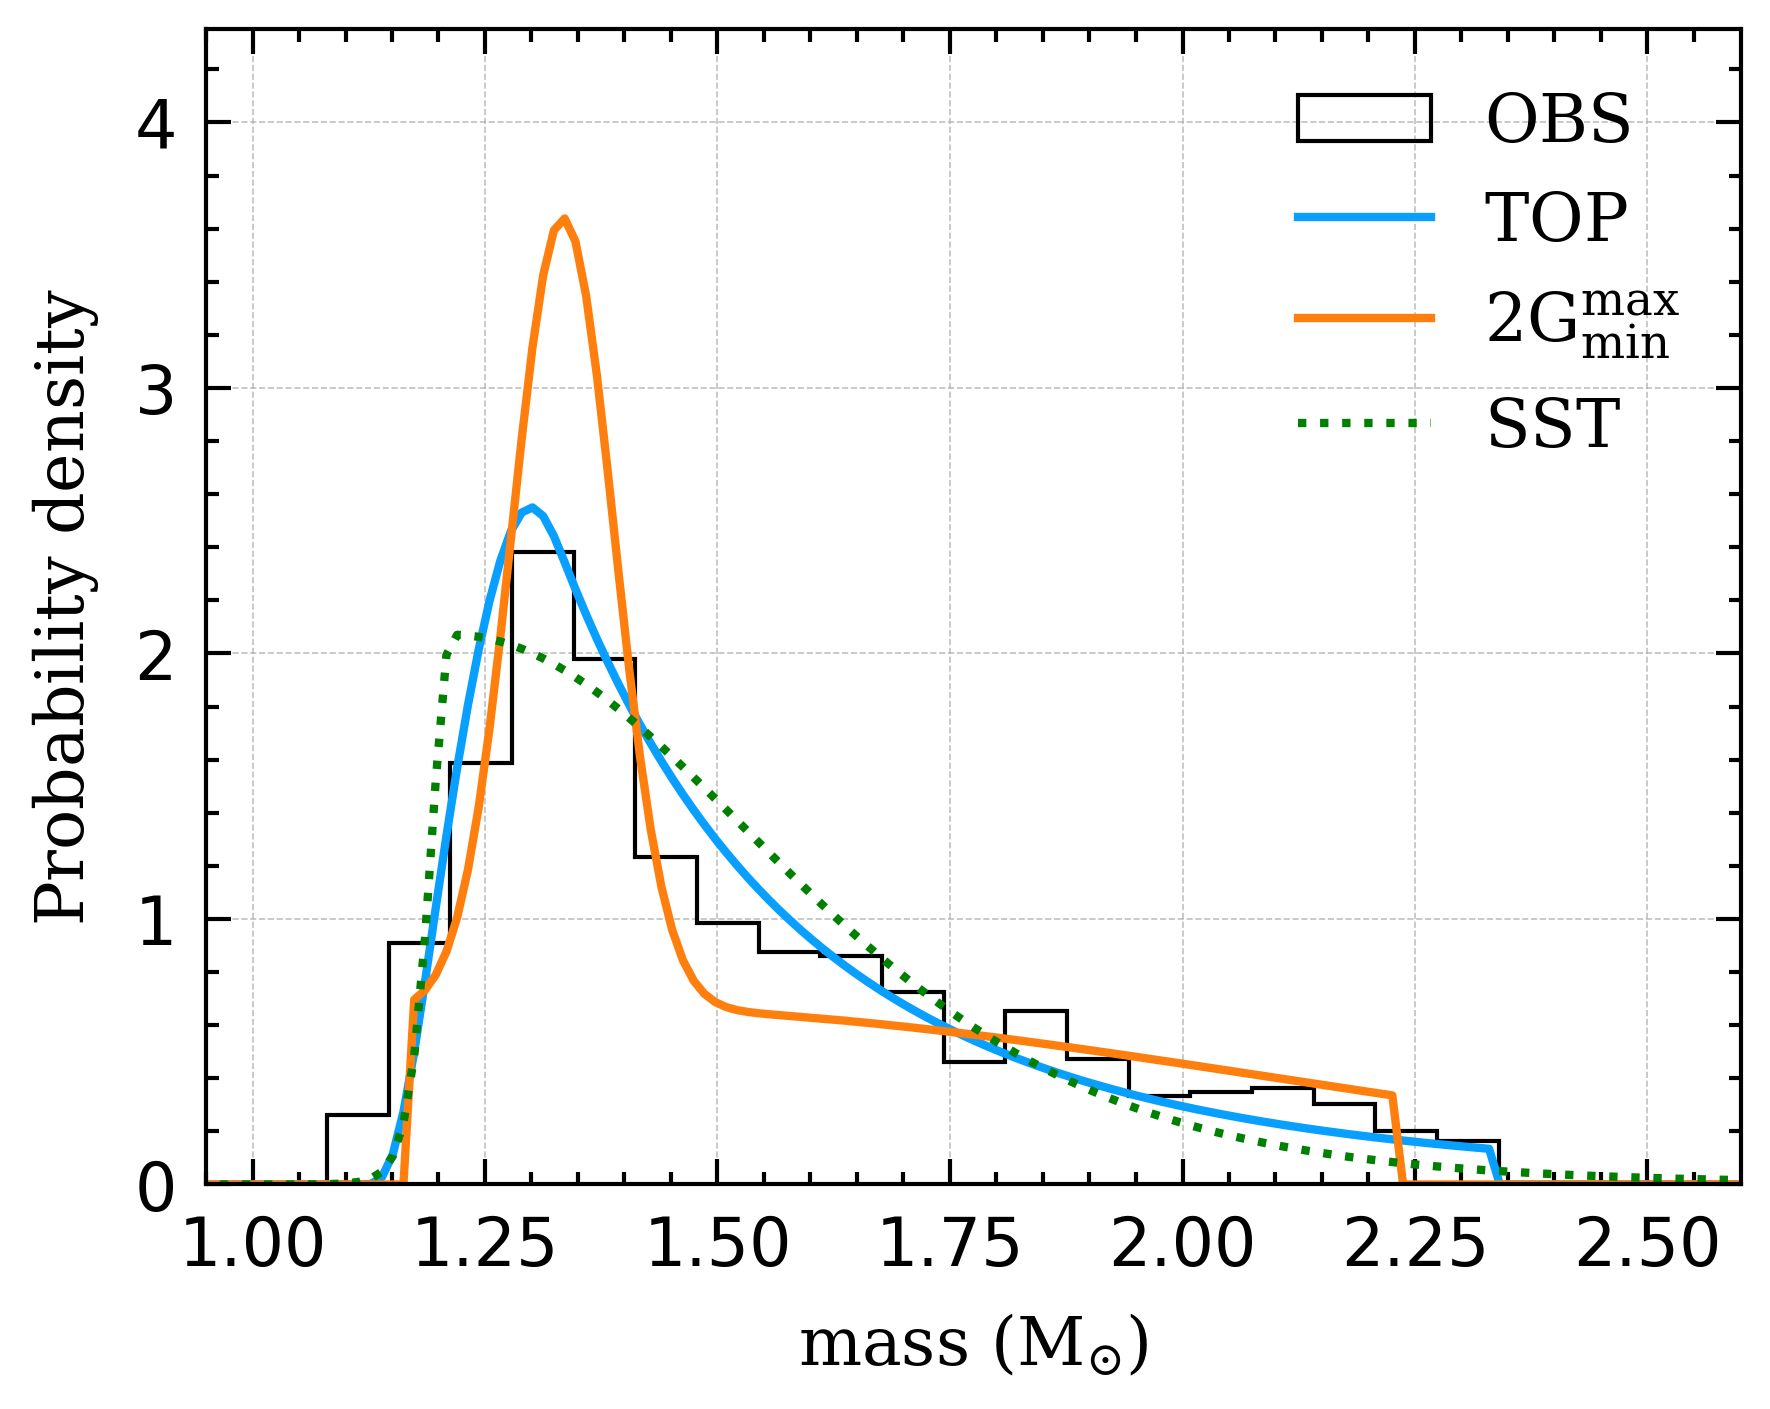

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


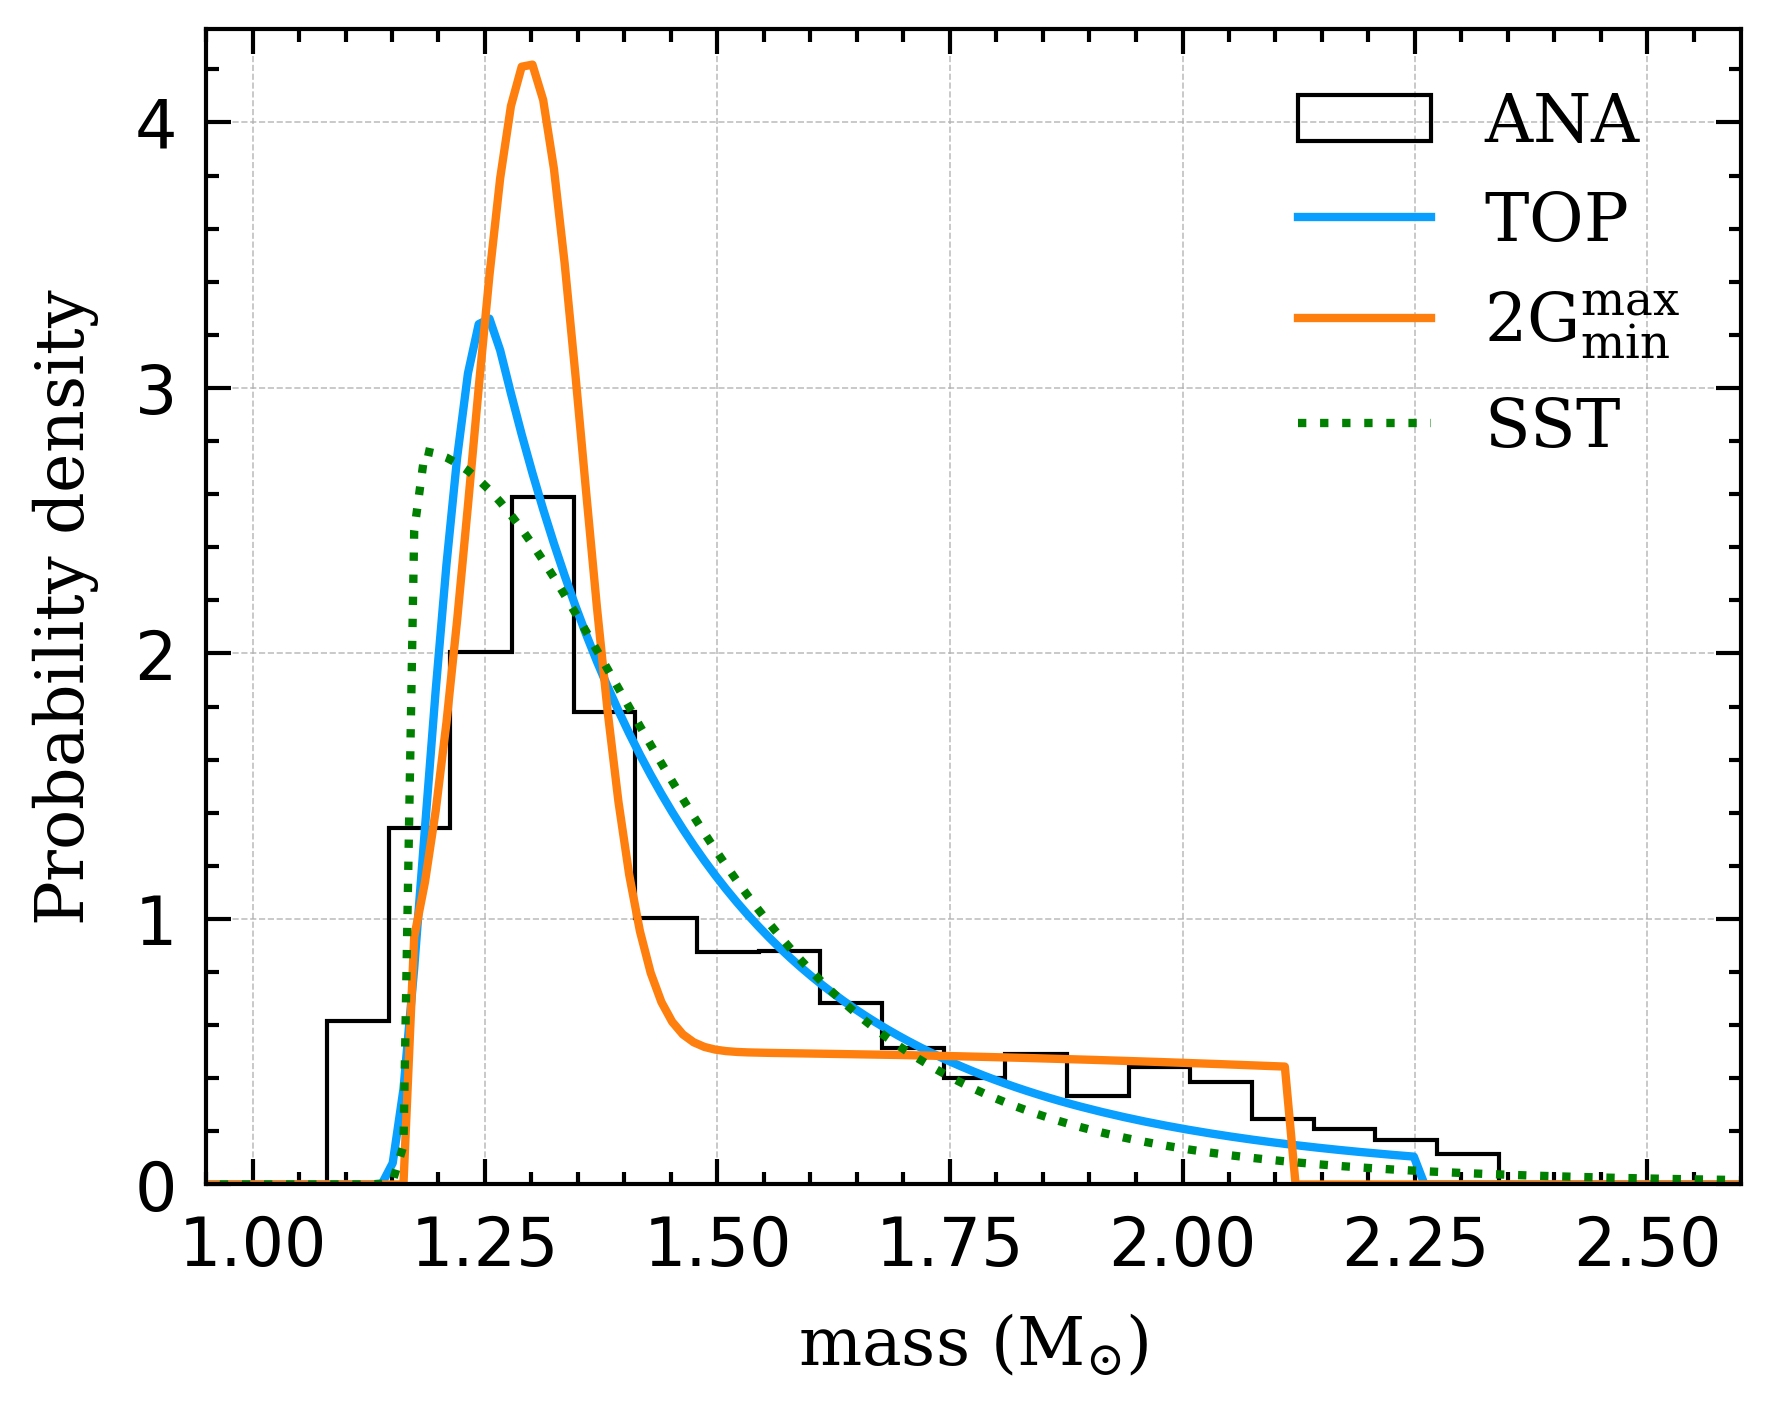

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


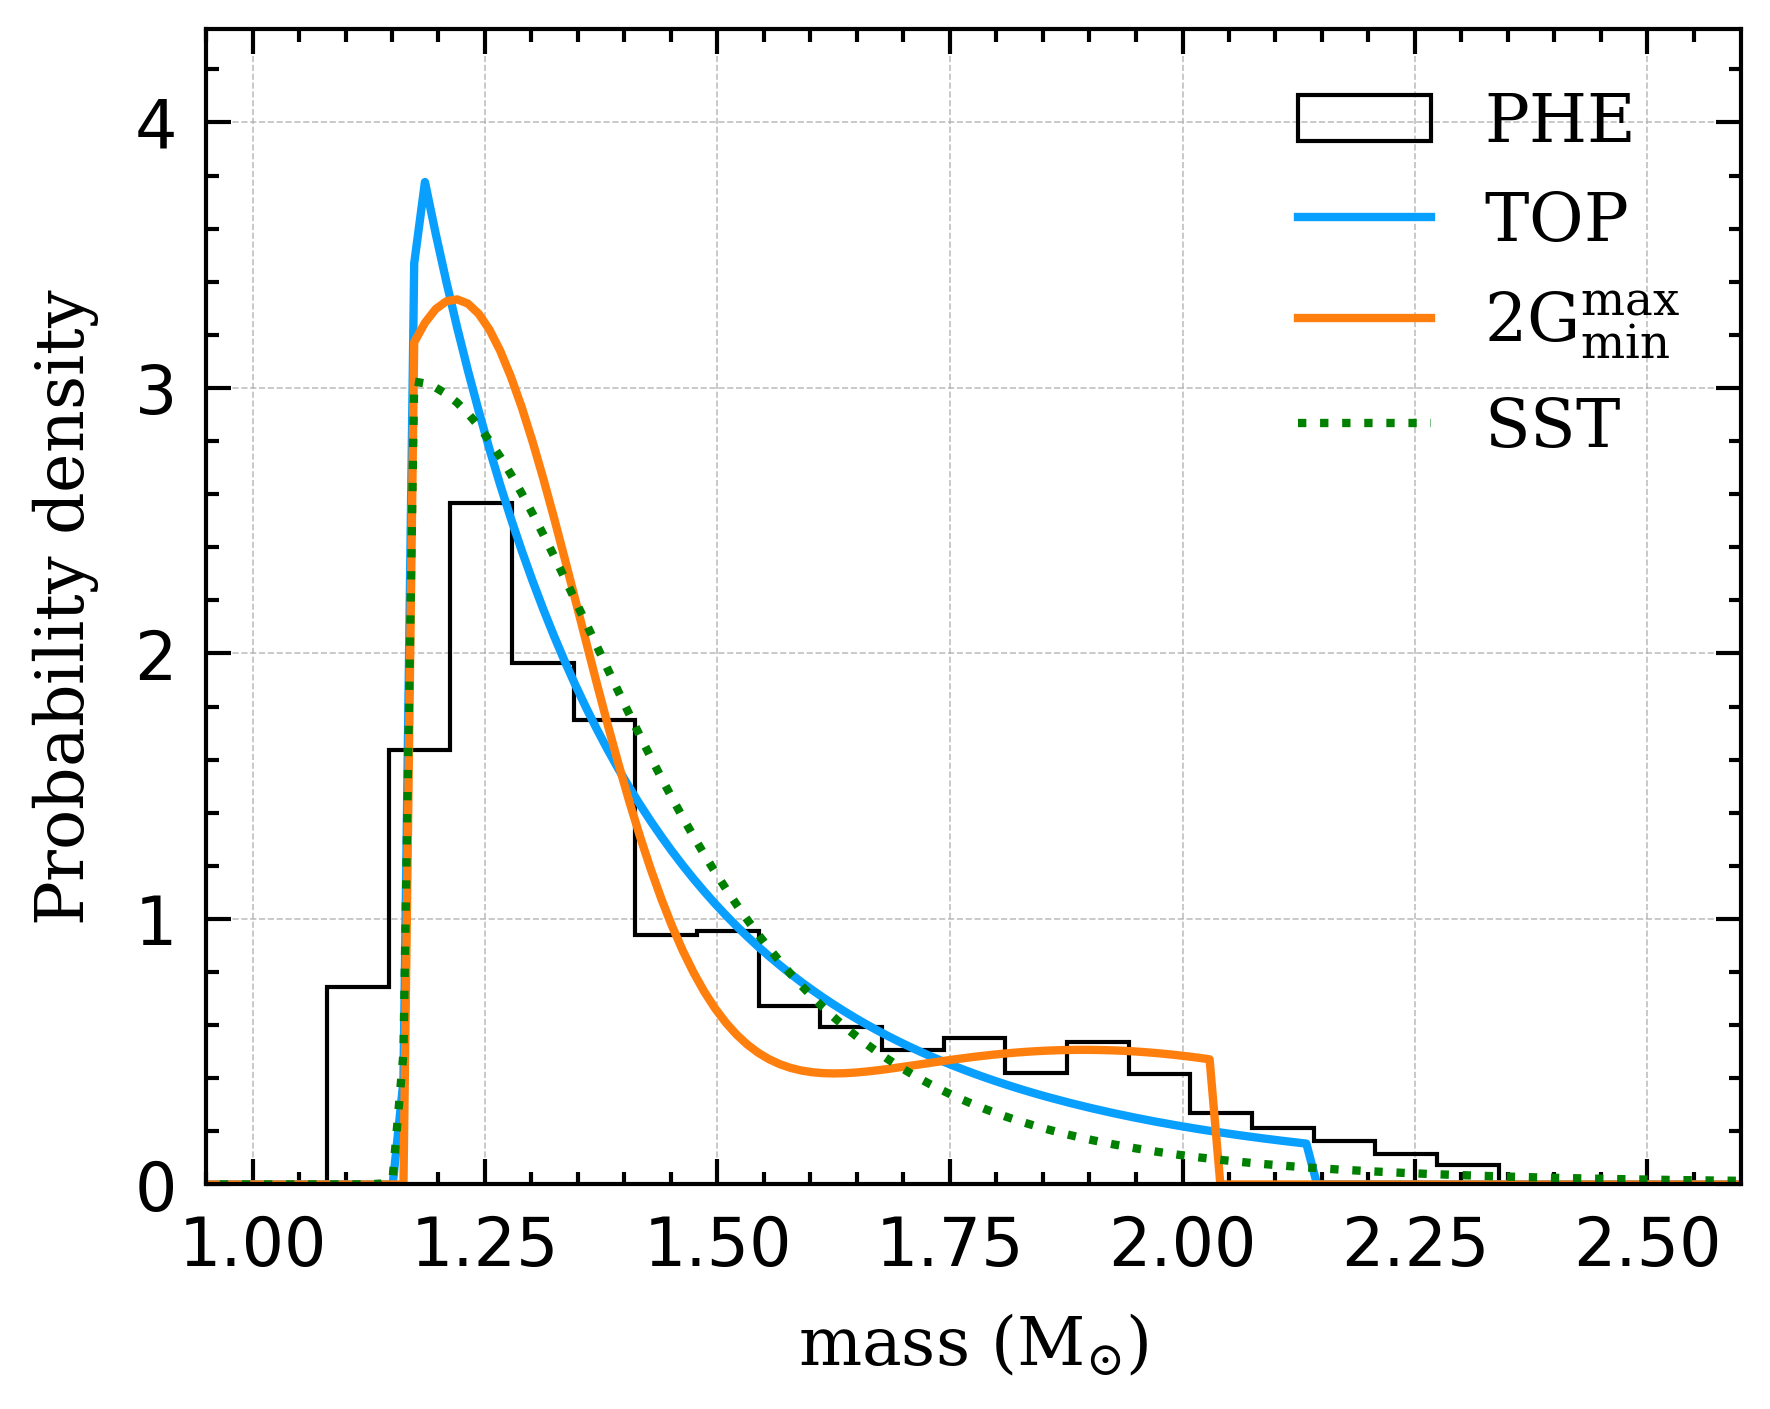

In [17]:
set_bins=np.linspace(1.08,2.34,20)
mii=np.linspace(0.7,3,200)
colorss=['#089FFF','#ff7f0e','green']
lss=['-','-','dotted']

for j in part_mrms_data_index:
    plt.hist(data_sets['data_'+str(mrms_data_label[j])],bins=set_bins,histtype='step',ls='-',\
             color='k',lw=0.5,density=True,label=data_name_labes[j])
    for i in model_indexs:
        mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
        y_models=mass_model(mii,*model_maxl[str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])] ) 
        plt.plot(mii,y_models,c=colorss[model_indexs.index(i)] , ls=lss[model_indexs.index(i)],label=r'{}'.format(model_name_label[i]) )
        plt.grid( linestyle='--',lw=0.2,alpha=0.8)
        
    plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
    plt.ylabel(r'$\rm{Probability\,\,density}$')
    plt.xlim(0.95,2.6)
    plt.ylim(0,4.35)
    plt.legend(loc='upper right')
    plt.show()

# only model maxmum_likelihood

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


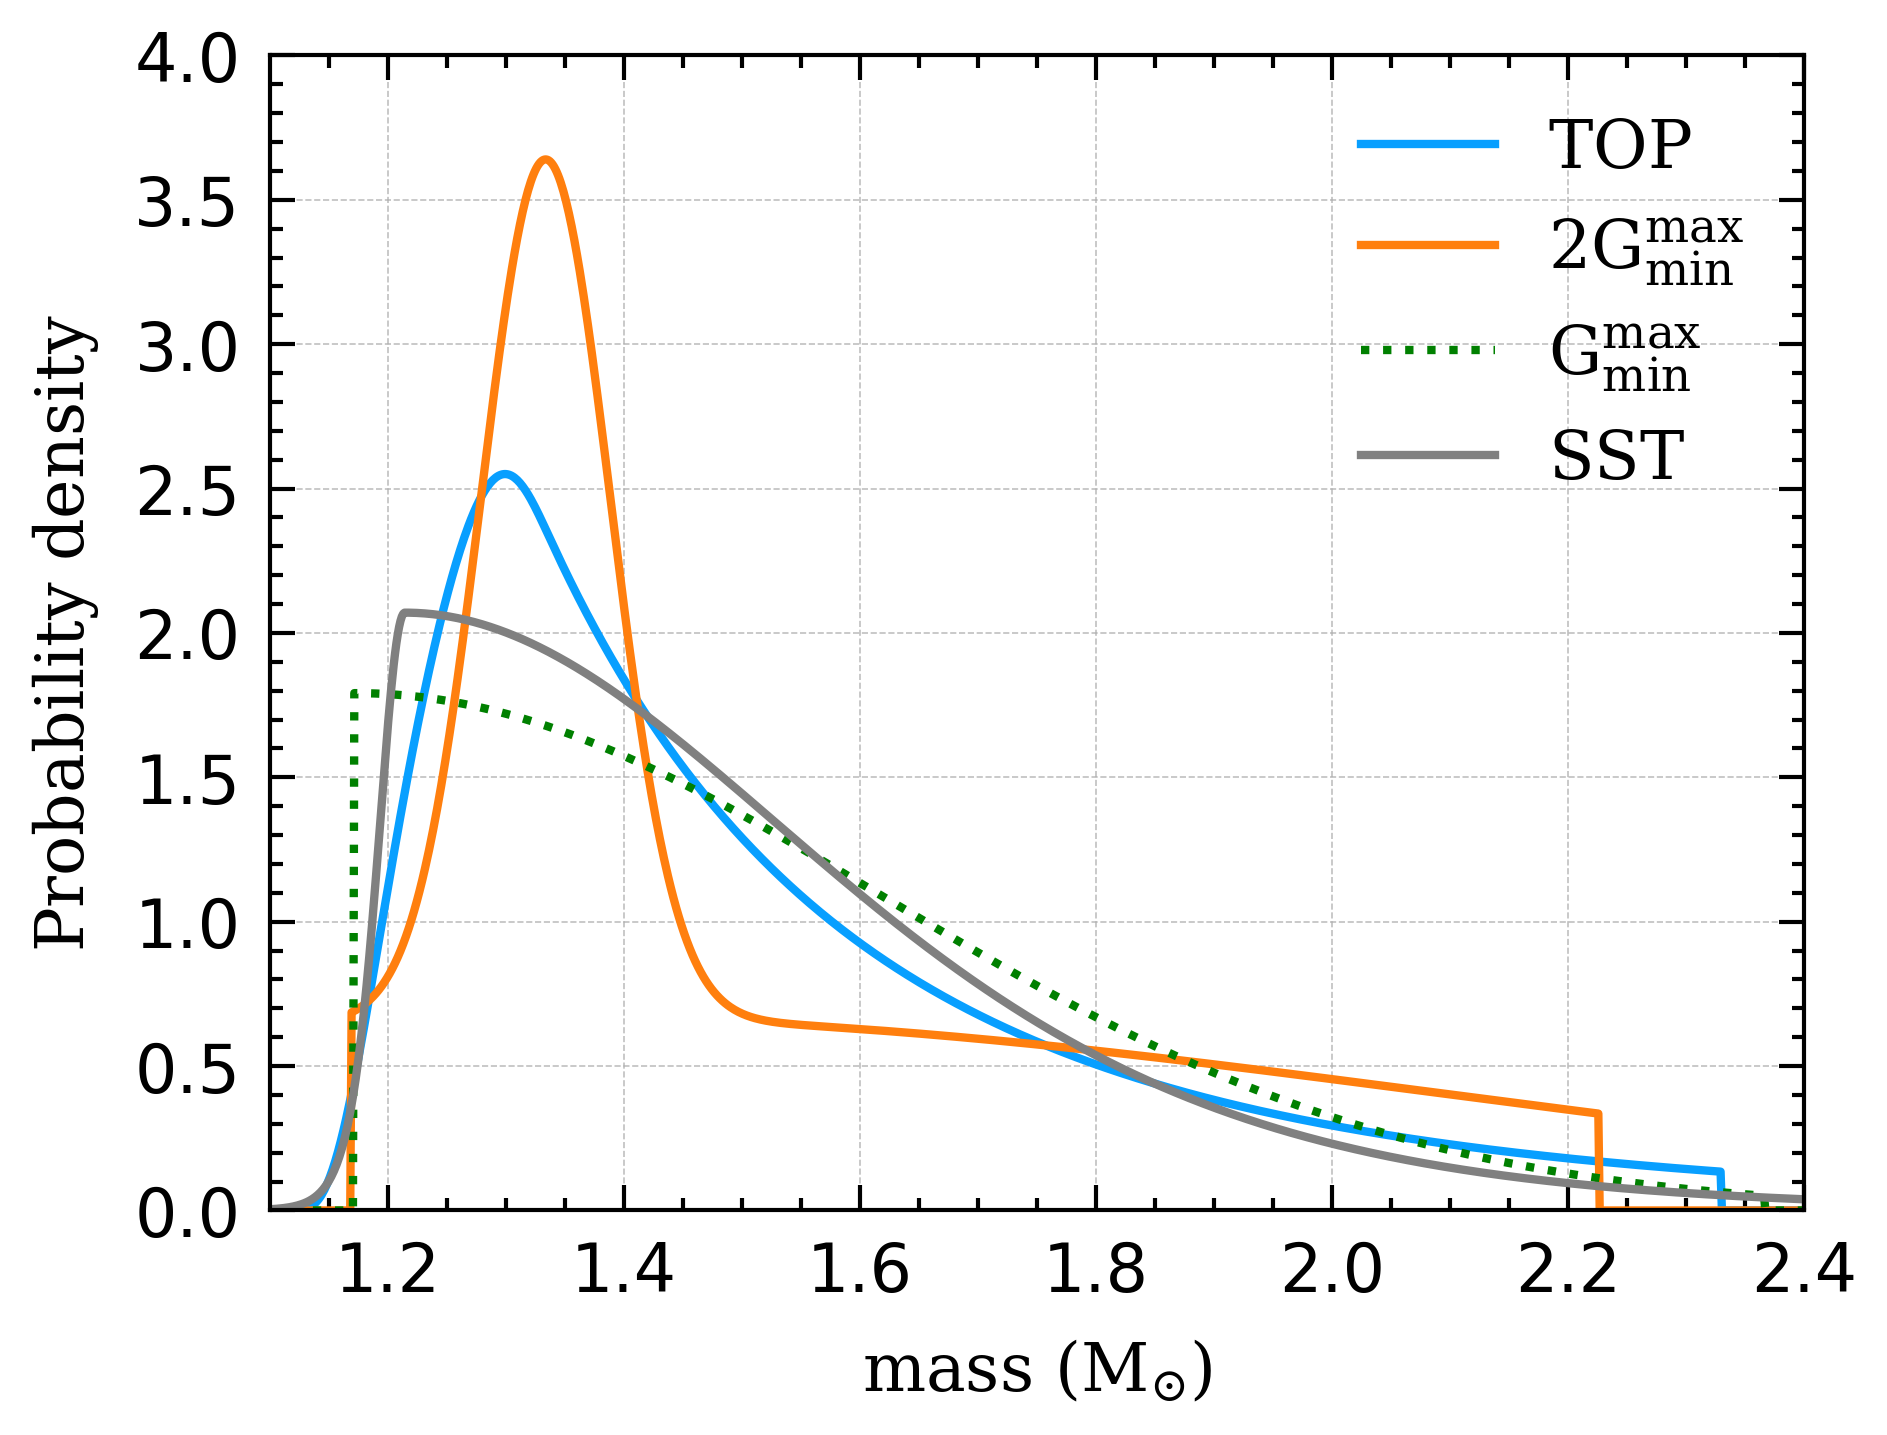

In [7]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms  

set_bins=np.linspace(1.08,2.34,20)
mii=np.linspace(0.7,3,2000)
colorss=['#089FFF','#ff7f0e','green','grey','k']
lss=['-','-','dotted','-','-']

model_index=[0,4,6,8]
one_data_difmodel_maxl={}

j=0
for i in model_index:
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    pos=bilby.result.read_in_result( fname )
    poss=np.array(pos.posterior.iloc[-1,:-2])
    one_data_difmodel_maxl[str(sub_model_name_list[i])]=poss

    mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
    y_models=mass_model(mii,*one_data_difmodel_maxl[str(sub_model_name_list[i])] ) 
    plt.plot(mii,y_models,c=colorss[model_index.index(i)] , ls=lss[model_index.index(i)],label=r'{}'.format(model_name_label[i]) )
plt.grid( linestyle='--',lw=0.2,alpha=0.8)


plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.xlim(1.1,2.4)
plt.ylim(0,4)
plt.legend(loc='upper right')
plt.savefig('top_2g_sst_4models_maxl.jpg')
plt.show()

# all dataset for top 2g sst

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


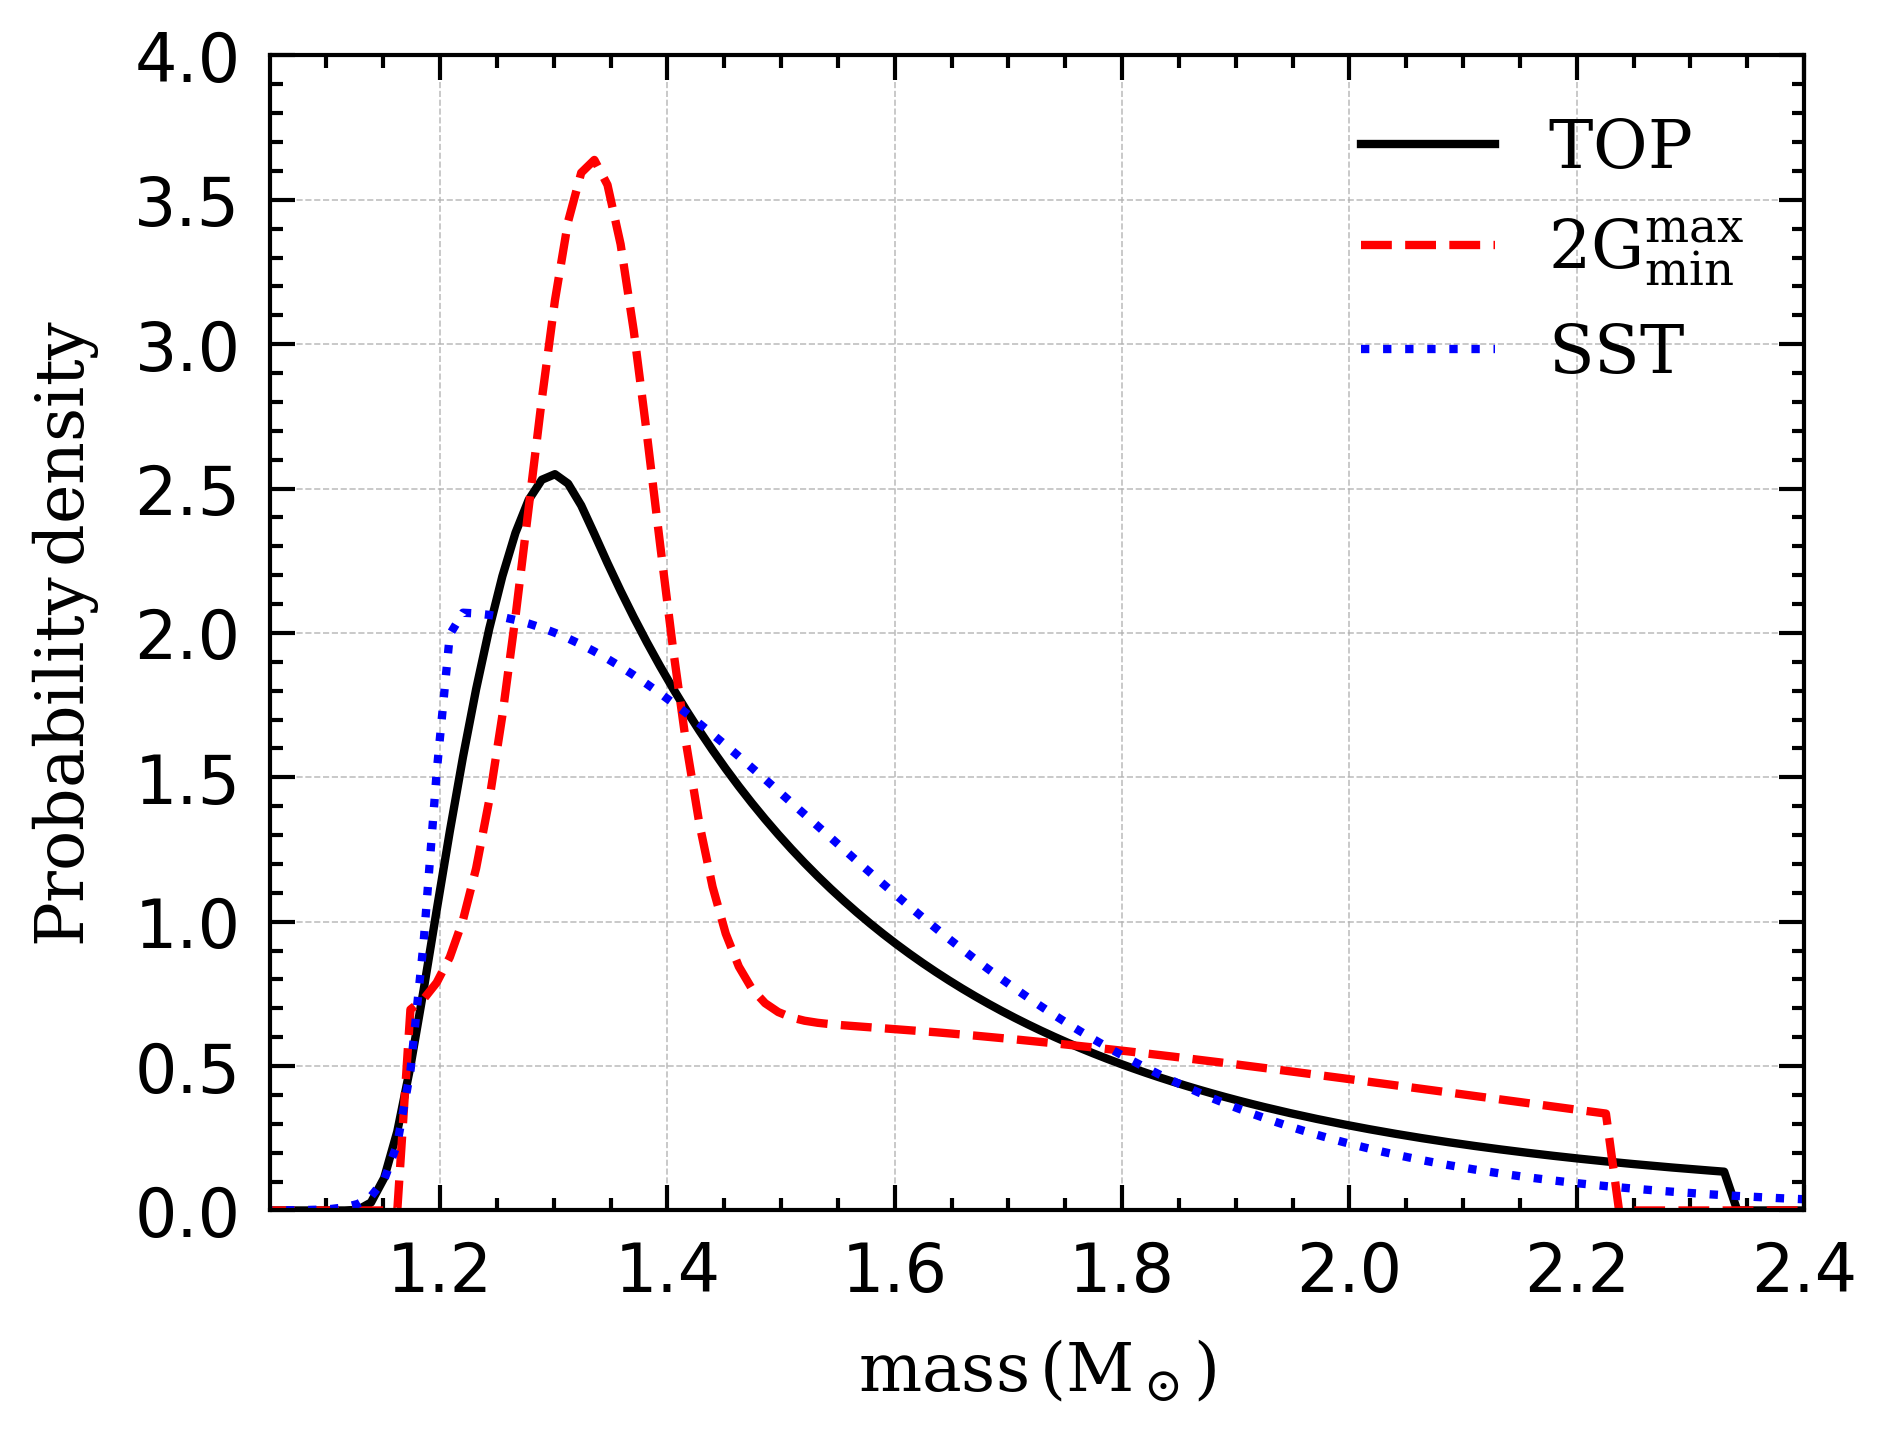

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


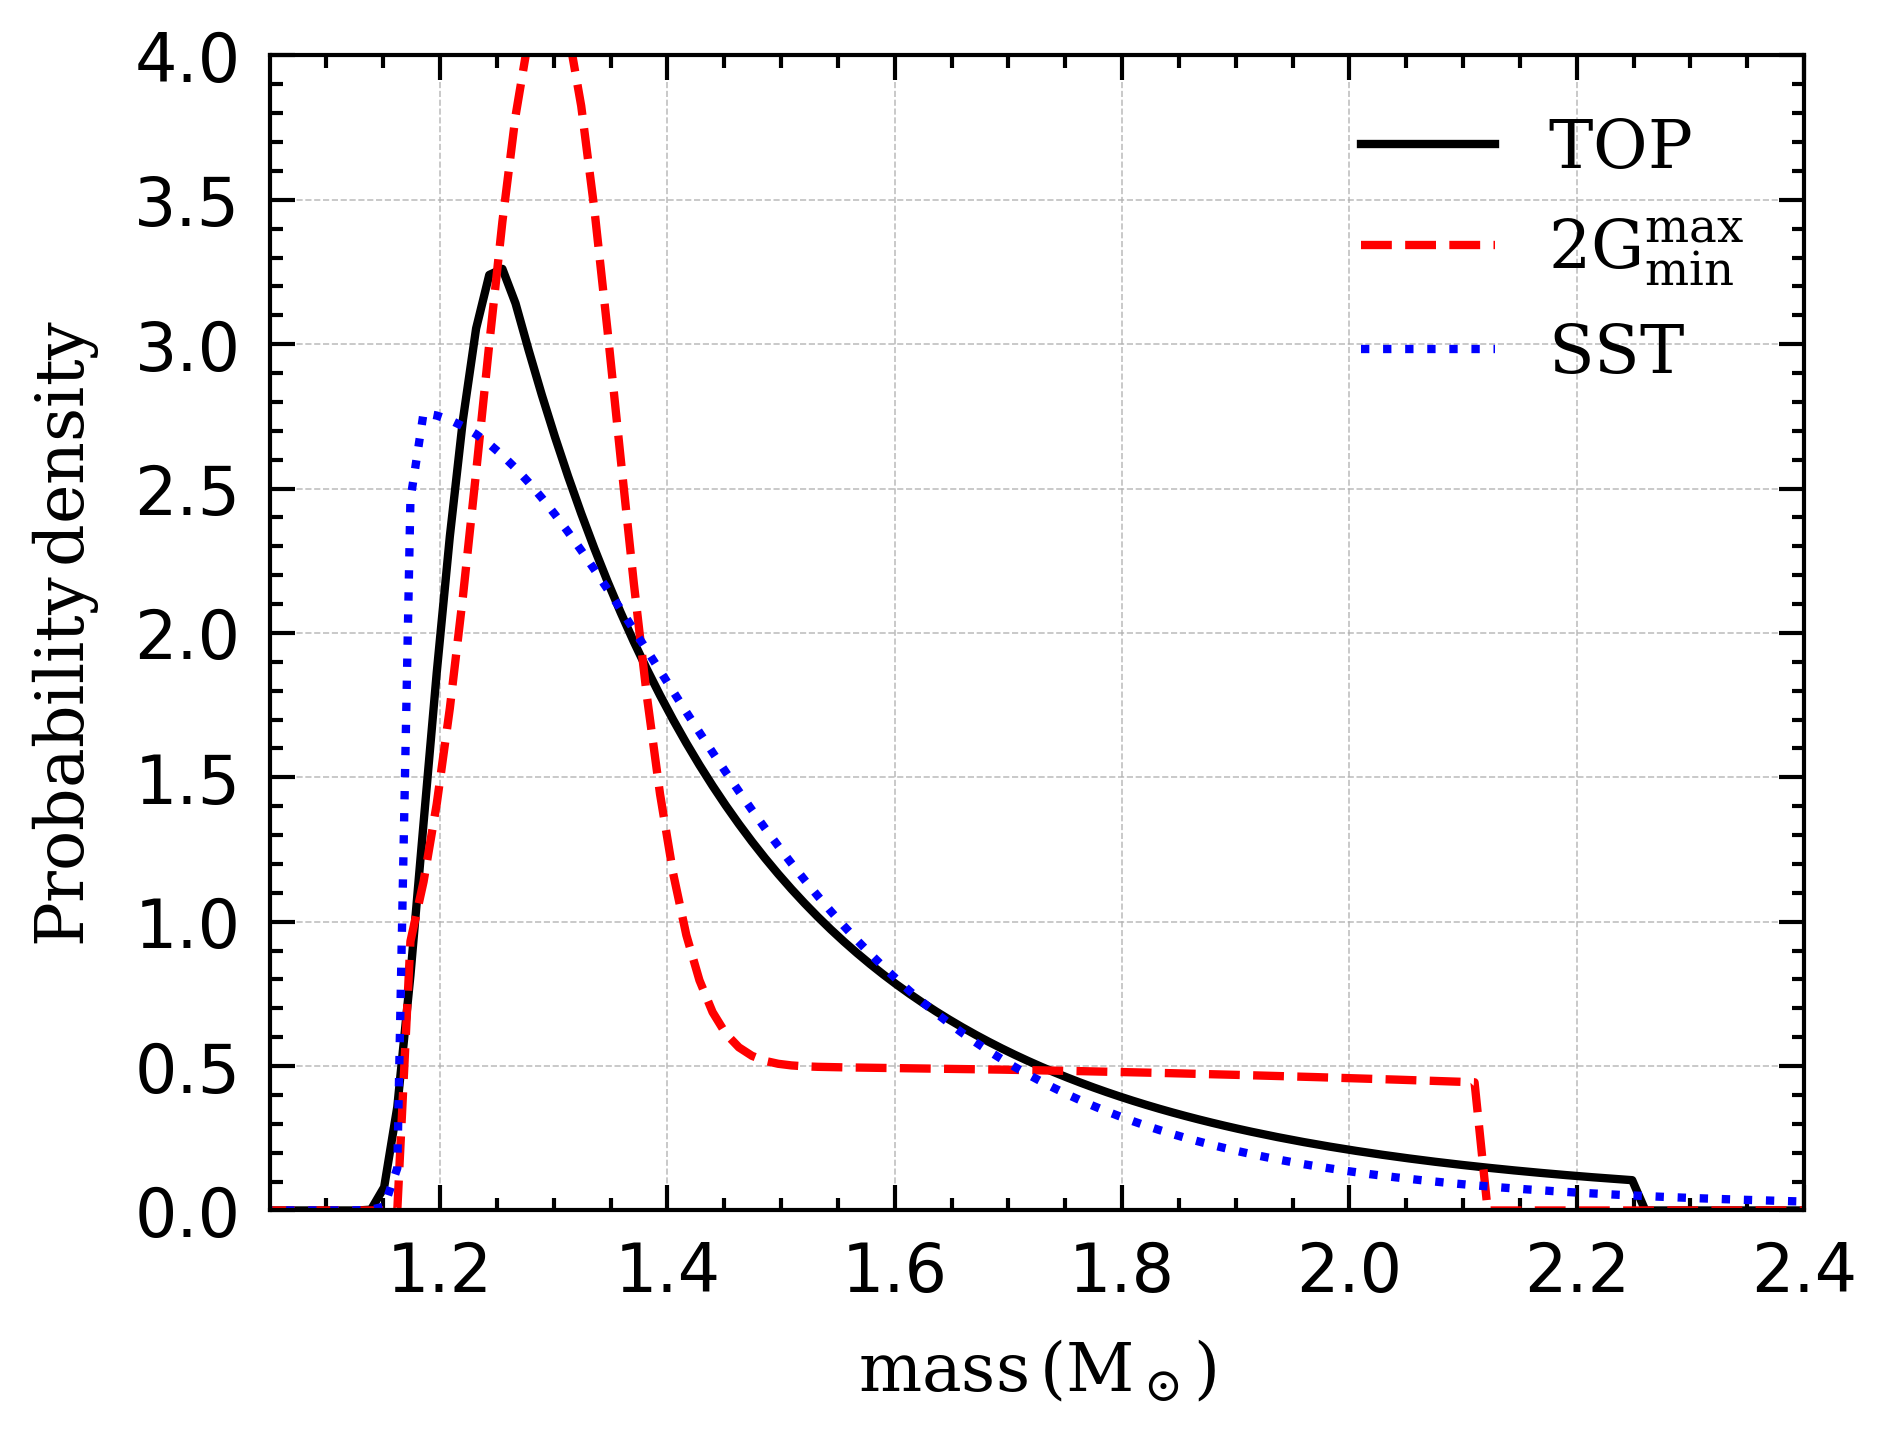

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


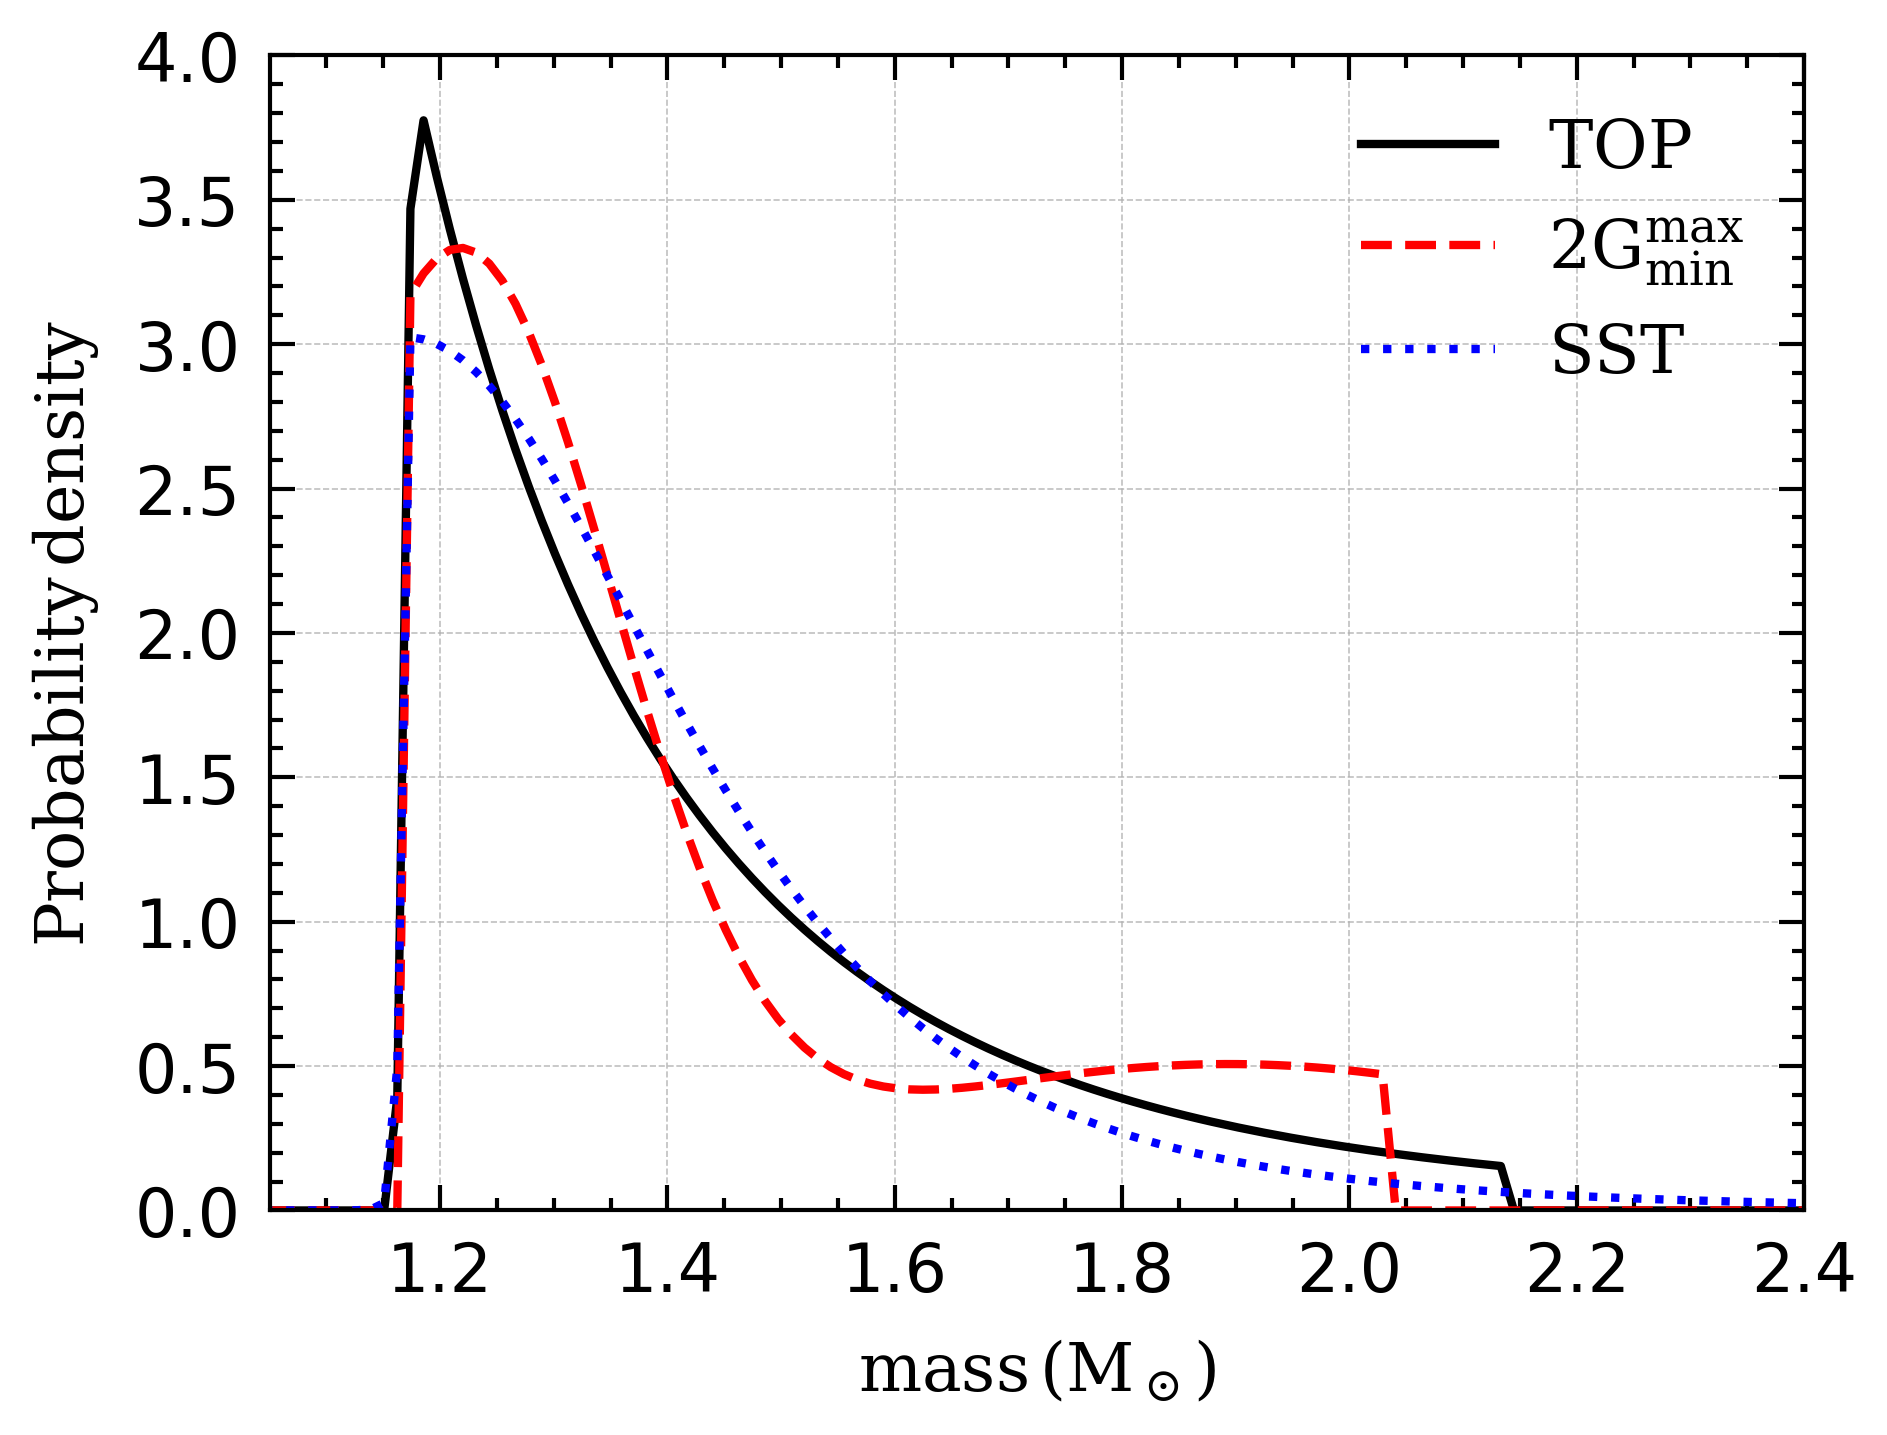

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


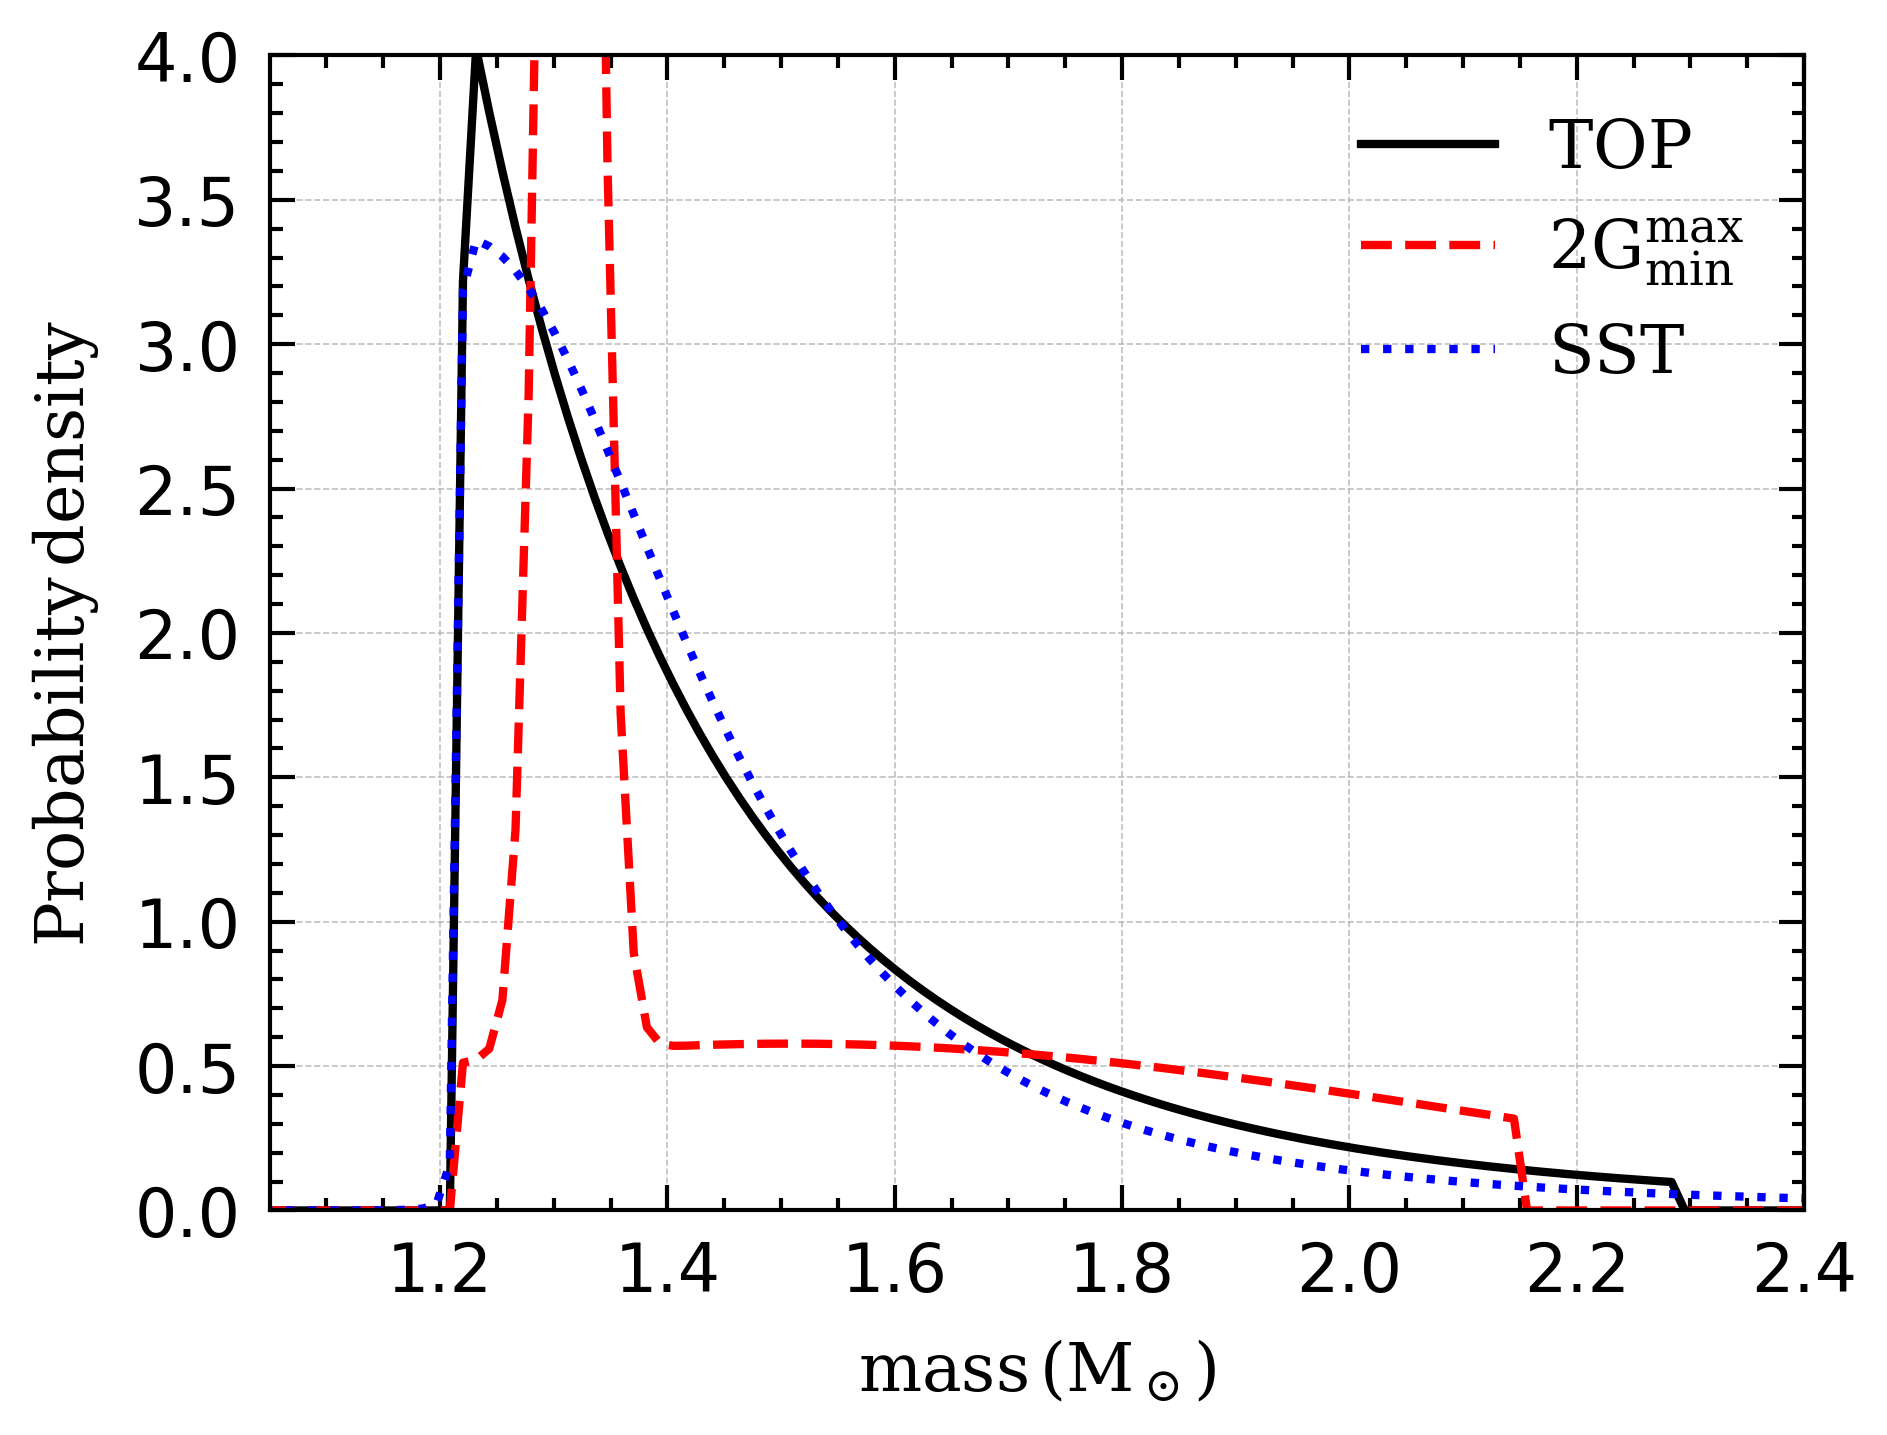

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


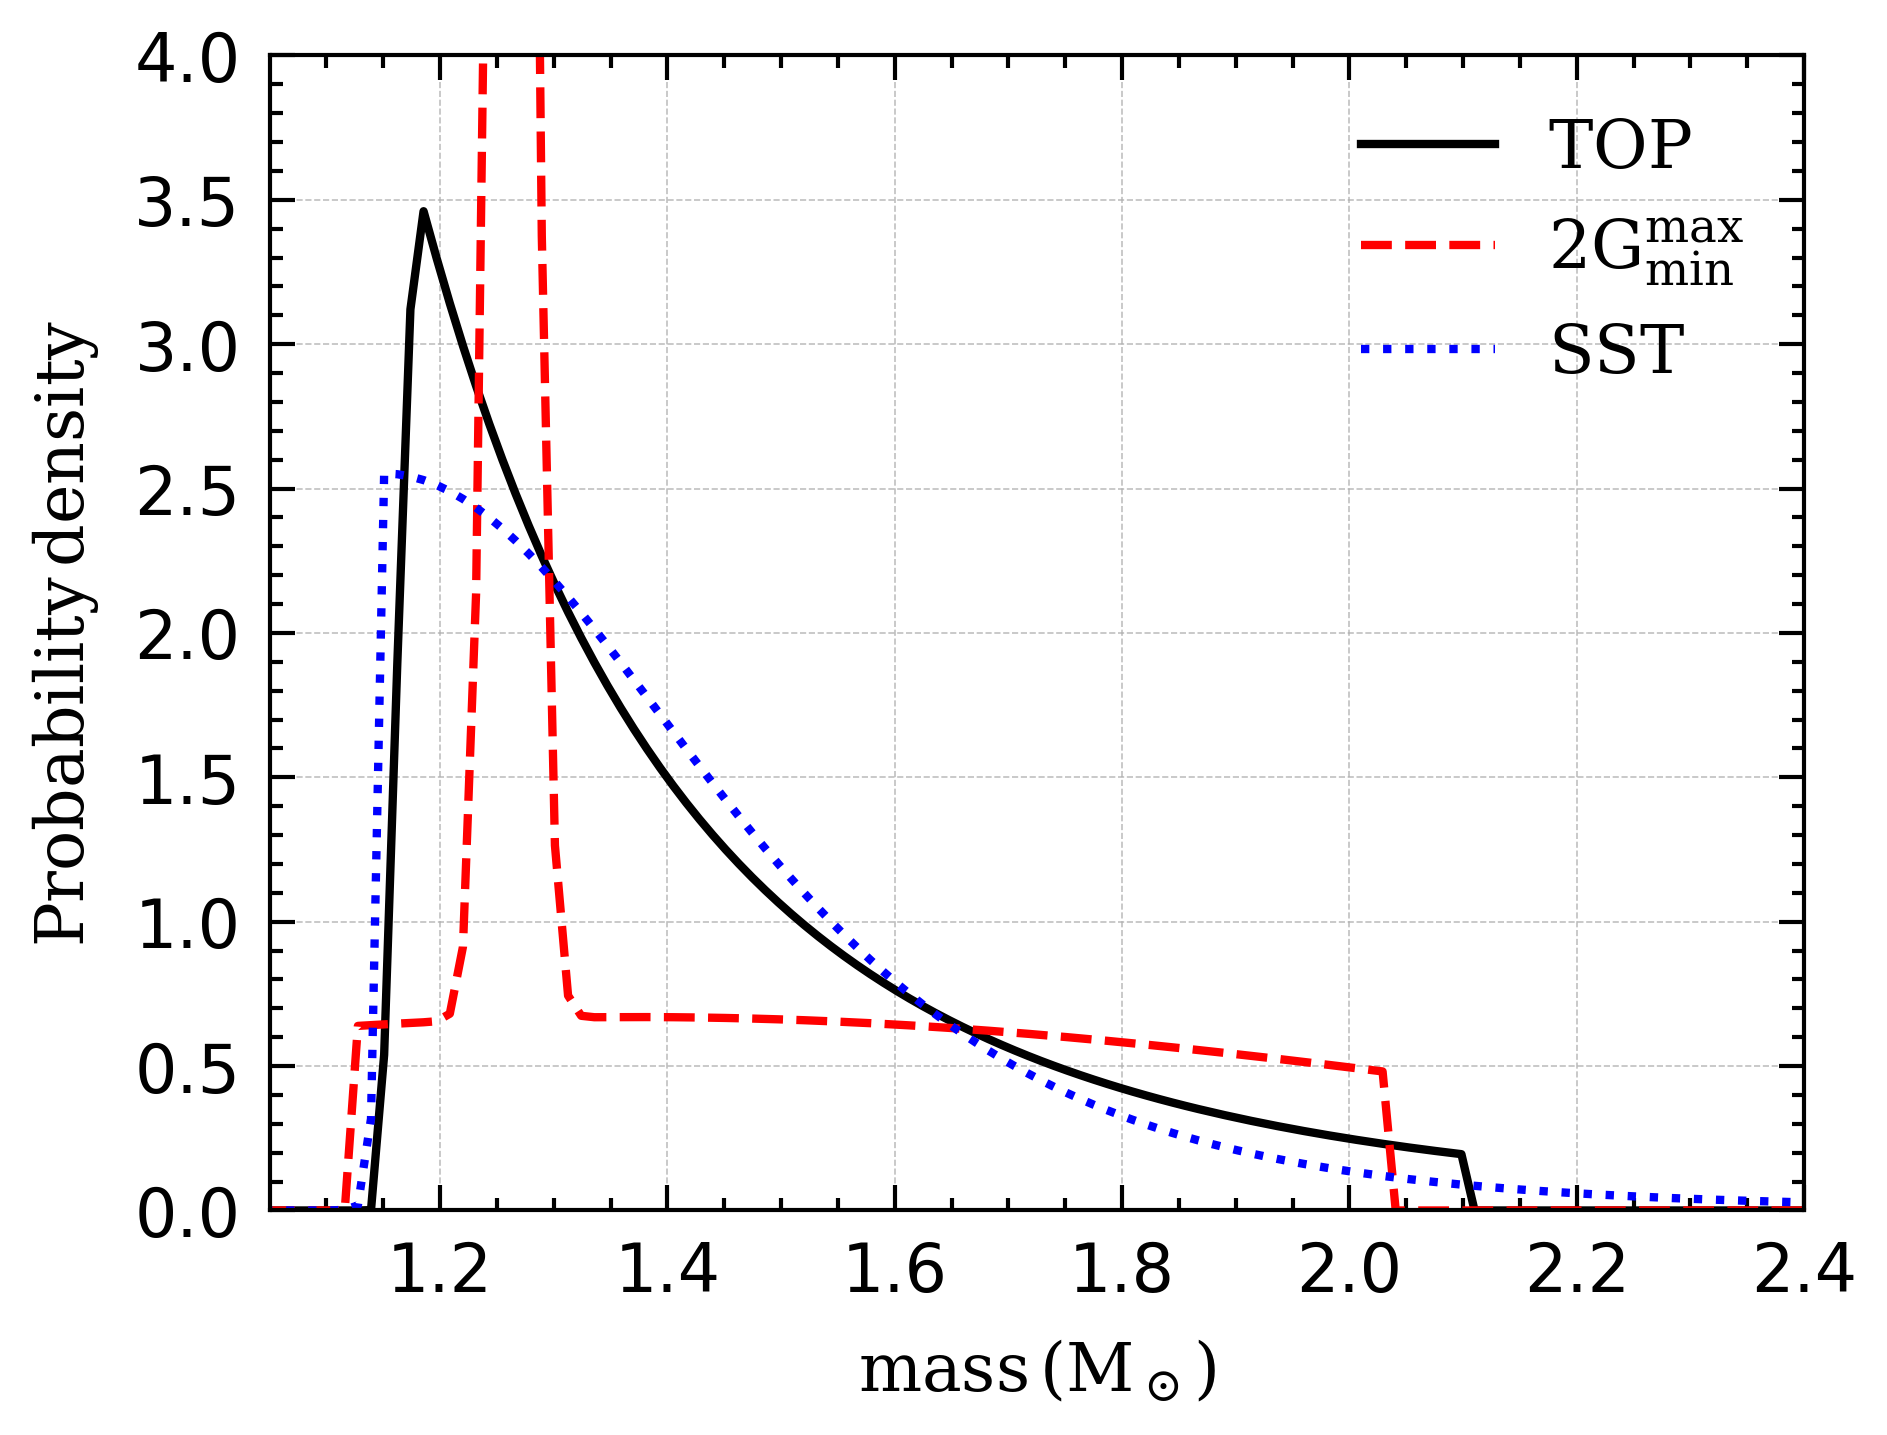

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


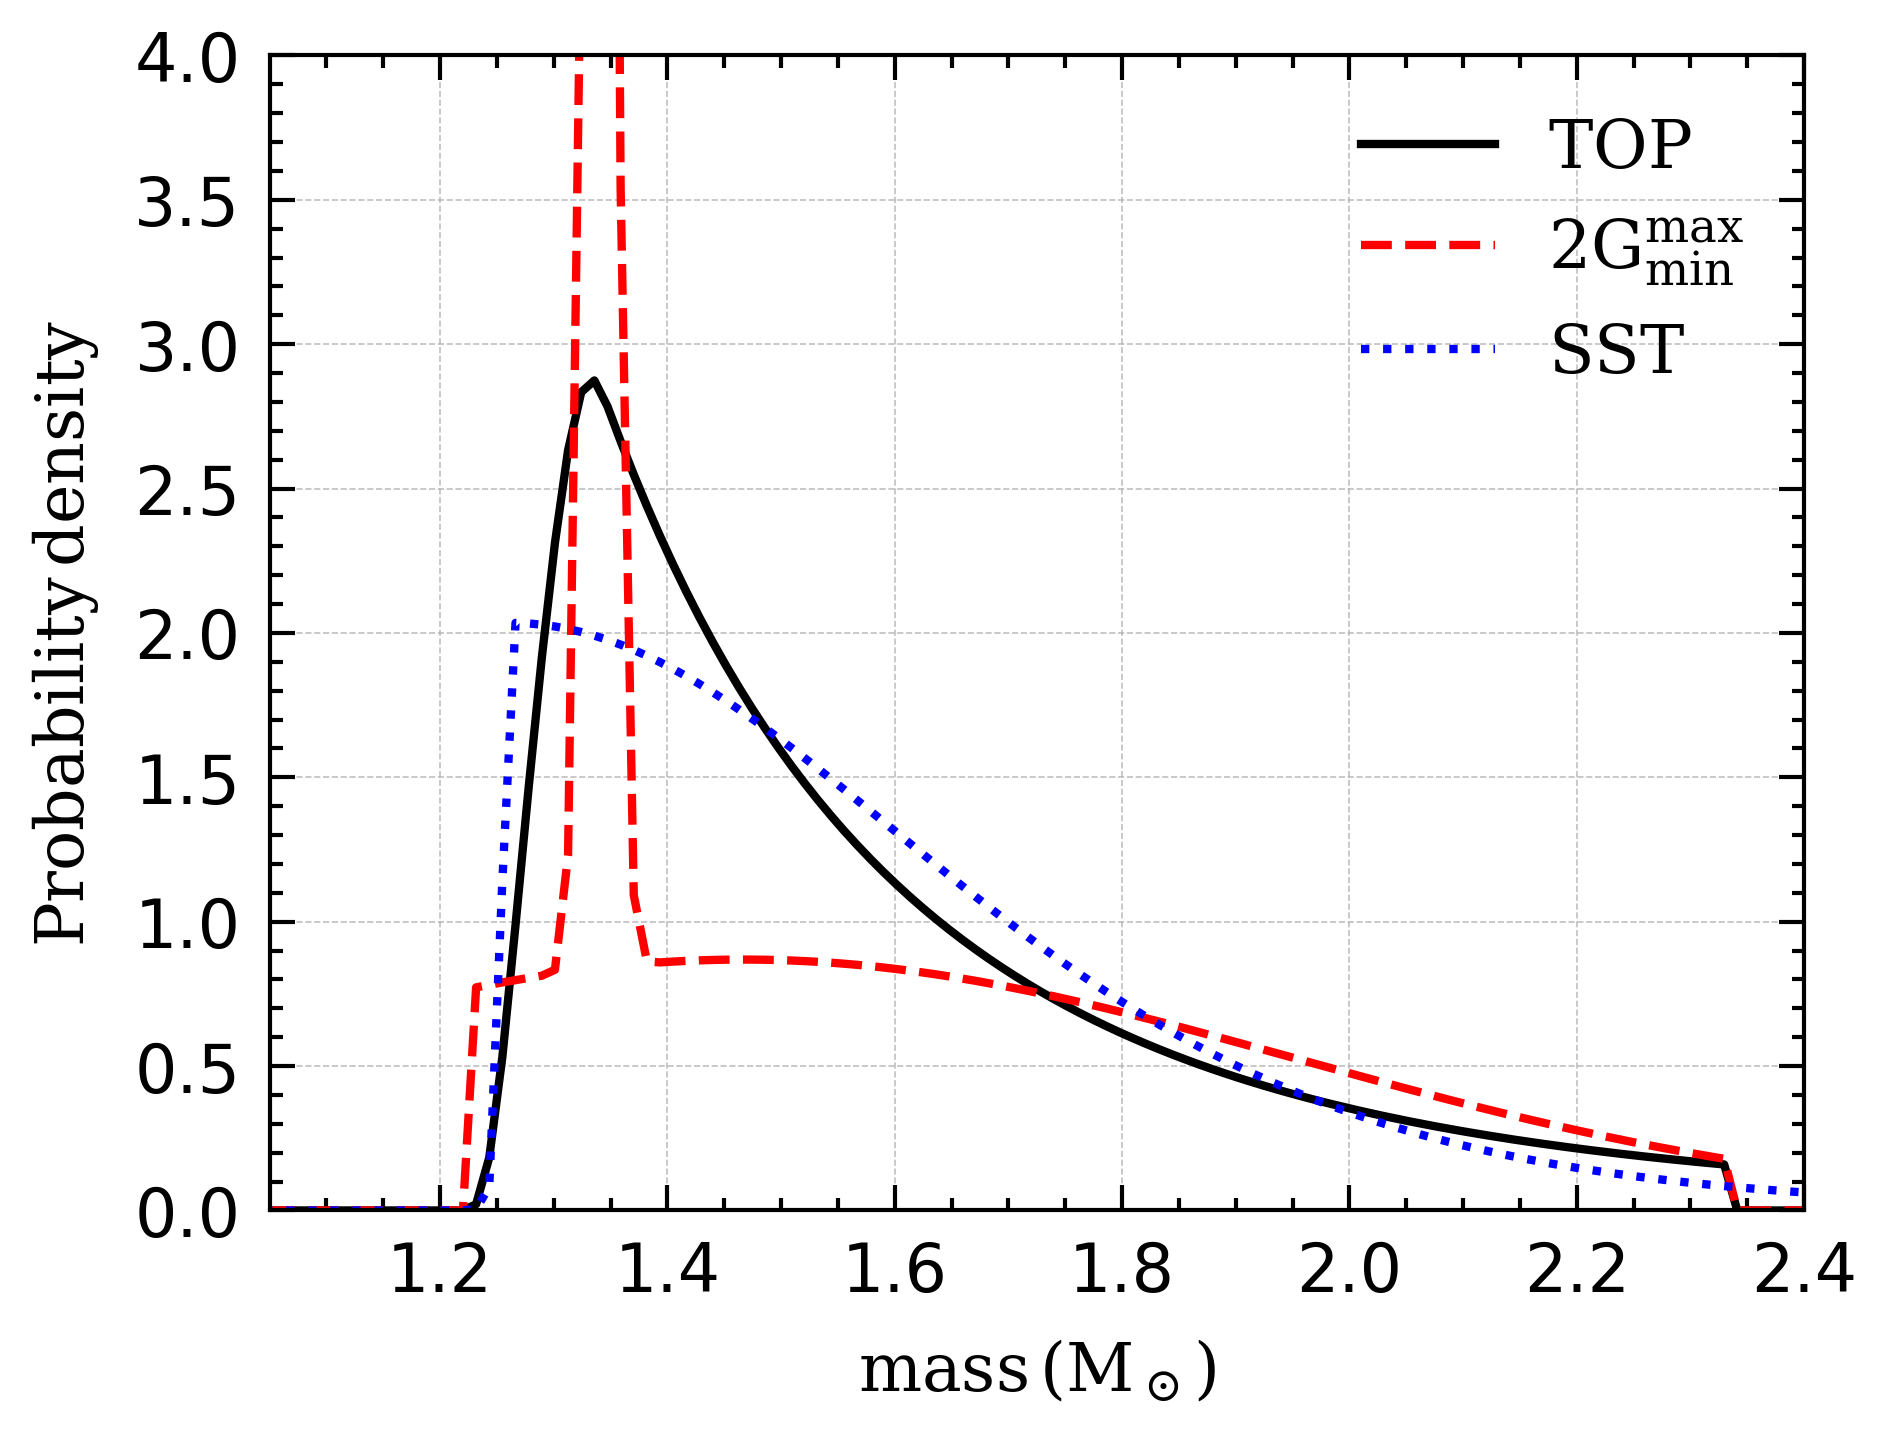

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


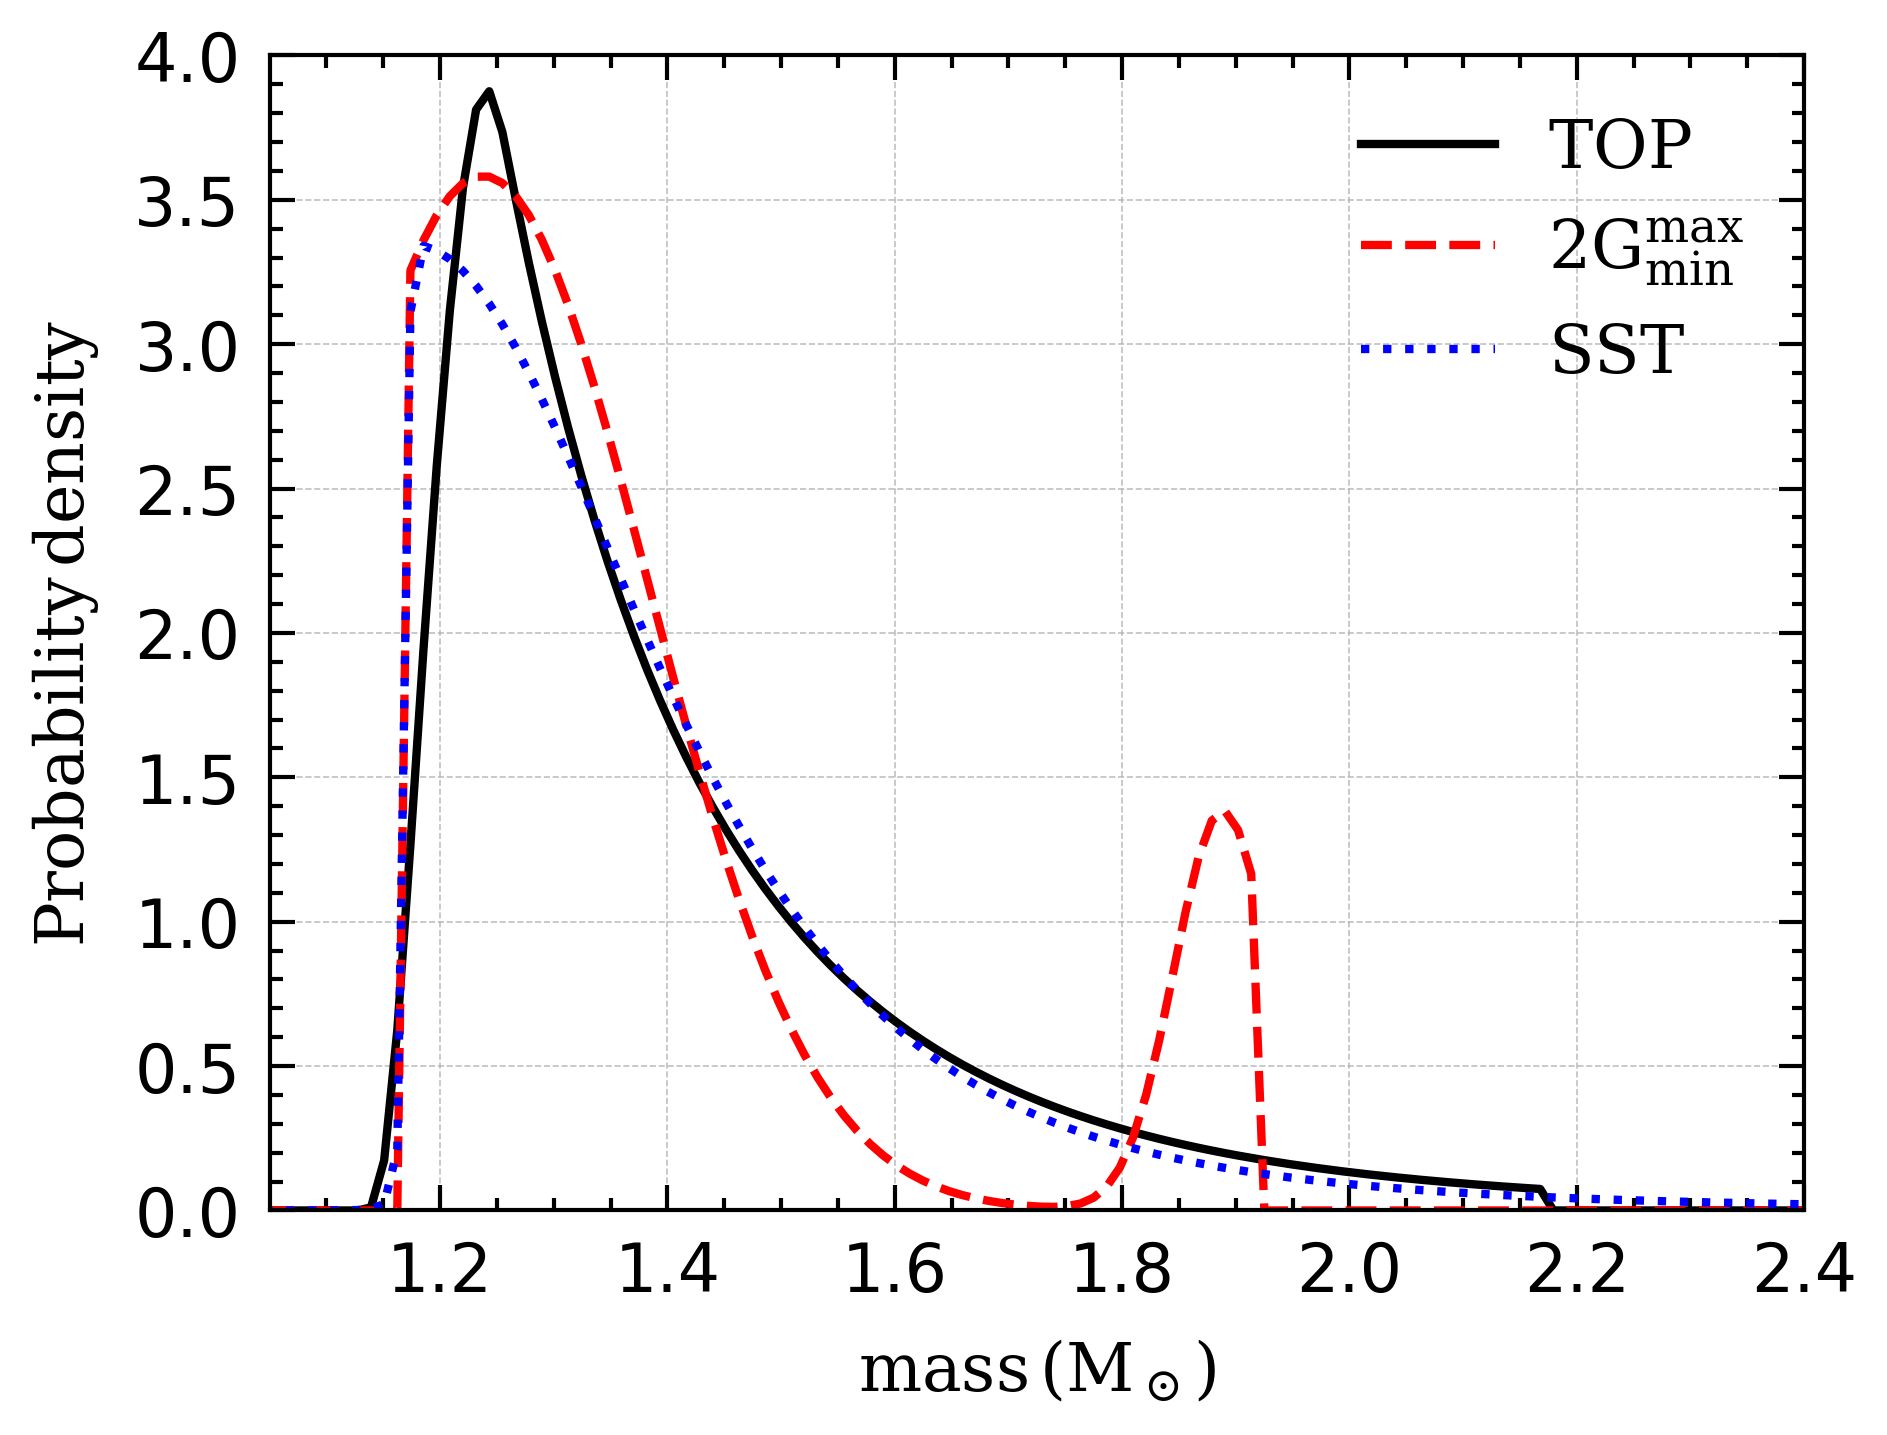

In [29]:
import utilizes_plot
import numpy as np
import matplotlib as mpl
import scienceplots
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms  

one_data_difmodel_maxl={}
for j in range(len(mrms_data_label)):
    for i in range(len(sub_model_name_list)):
        os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
        fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
        fname=fnames[0]
        pos=bilby.result.read_in_result( fname )
        poss=np.array(pos.posterior.iloc[-1,:-2])
        one_data_difmodel_maxl[str(mrms_data_label[j])+str(sub_model_name_list[i])]=poss


mii=np.linspace(0.7,3,200)
for j in range( len(mrms_data_label) ):
    for i in [0,4,8]:
        mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
        y_models=mass_model(mii,*one_data_difmodel_maxl[str(mrms_data_label[j])+str(sub_model_name_list[i])]) 
        plt.plot(mii,y_models ,label=r'{}'.format(model_name_label[i]) )
        plt.grid( linestyle='--',lw=0.2,alpha=0.8)
        plt.xlim(1.05,2.4)
        plt.ylim(0,4)
        #plt.yscale('log')
        plt.legend(loc='upper right')
        plt.xlabel(r'$ \rm mass \,(M_\odot)$' )
        plt.ylabel(r'$\rm Probability\,density$')
        #plt.title('{}'.format(mrms_data_label[j]))
    plt.savefig('maxL_model_compare_{}.jpg'.format(mrms_data_label[j]))
    plt.show()